## Practice from
https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python

#### Imports

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In [36]:
#import affinity

In [37]:
print('matplotlib: {}'.format(matplotlib.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('seaborn: {}'.format(sns.__version__))
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

matplotlib: 2.0.2
sklearn: 0.20.0
scipy: 1.1.0
seaborn: 0.9.0
pandas: 0.23.4
numpy: 1.13.3
Python: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


### Setup

In [4]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
warnings.filterwarnings('ignore')
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

### Exploratory Data Analysis(EDA)

#### Data Collection

In [5]:
# import train and test to play with it
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [6]:
type(train)

pandas.core.frame.DataFrame

In [7]:
type(test)

pandas.core.frame.DataFrame

### Visualizations

#### Scatter Plot

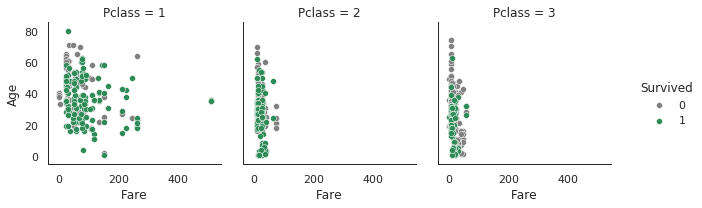

In [8]:
# Modify the graph above by assigning each species an individual color.
g = sns.FacetGrid(train, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g=g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend();

#### Plot

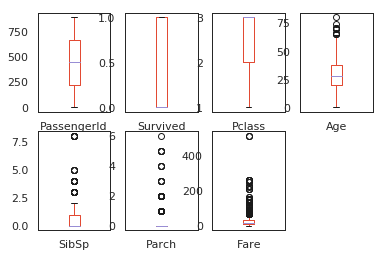

In [9]:
train.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.figure()
#This gives us a much clearer idea of the distribution of the input attributes:

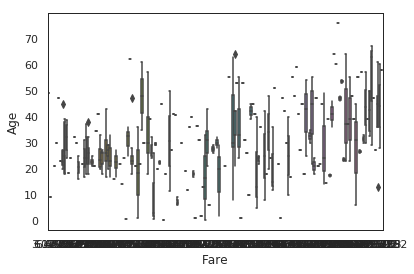

In [10]:
# To plot the species data using a box plot:

sns.boxplot(x="Fare", y="Age", data=test )
plt.show()

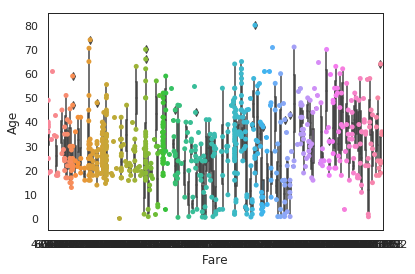

In [11]:
# Use Seaborn's striplot to add data points on top of the box plot 
# Insert jitter=True so that the data points remain scattered and not piled into a verticle line.
# Assign ax to each axis, so that each plot is ontop of the previous axis. 

ax= sns.boxplot(x="Fare", y="Age", data=train)
ax= sns.stripplot(x="Fare", y="Age", data=train, jitter=True, edgecolor="gray")
plt.show()

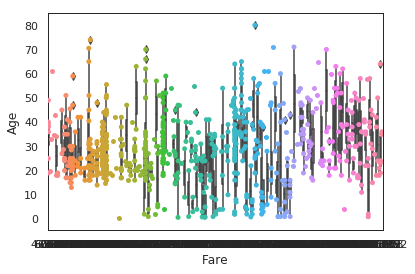

In [12]:
# Tweek the plot above to change fill and border color color using ax.artists.
# Assing ax.artists a variable name, and insert the box number into the corresponding brackets

ax= sns.boxplot(x="Fare", y="Age", data=train)
ax= sns.stripplot(x="Fare", y="Age", data=train, jitter=True, edgecolor="gray")

boxtwo = ax.artists[2]
boxtwo.set_facecolor('red')
boxtwo.set_edgecolor('black')
boxthree=ax.artists[1]
boxthree.set_facecolor('yellow')
boxthree.set_edgecolor('black')

plt.show()

#### Histogram

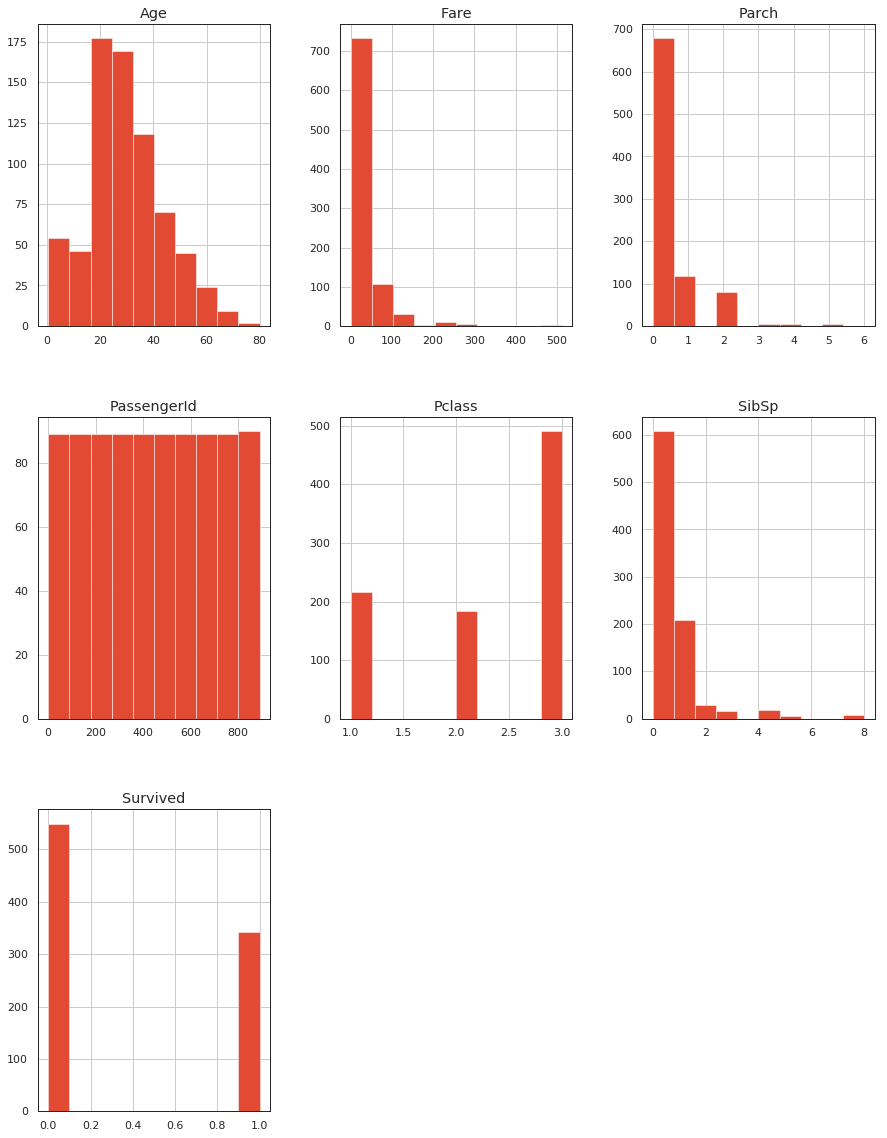

In [13]:
# histograms
train.hist(figsize=(15,20))
plt.figure()

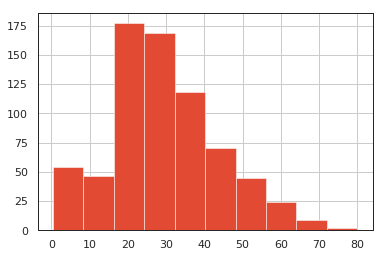

In [14]:
#it looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

train["Age"].hist();

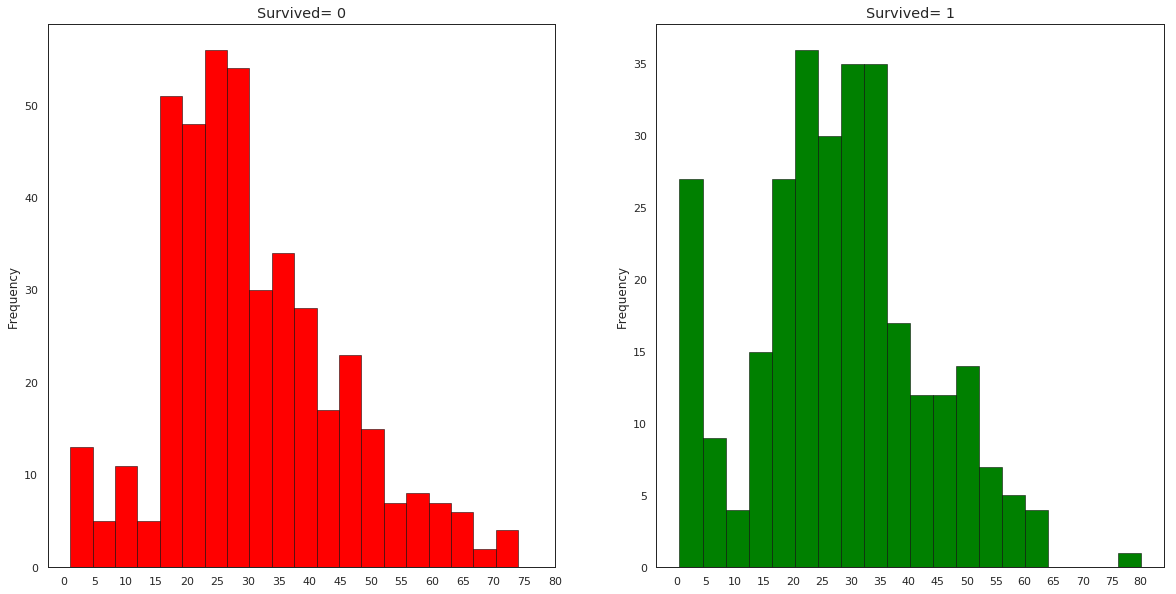

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

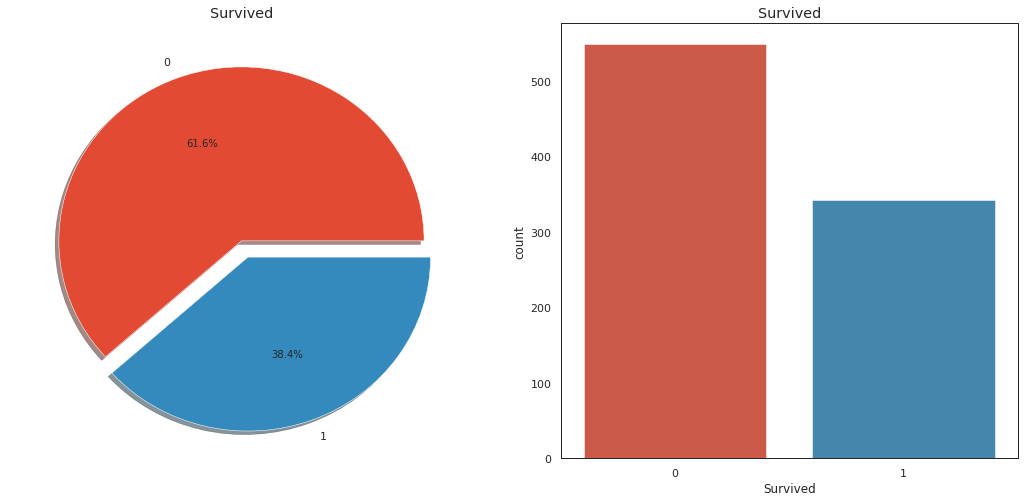

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

#### Multivariate Plots

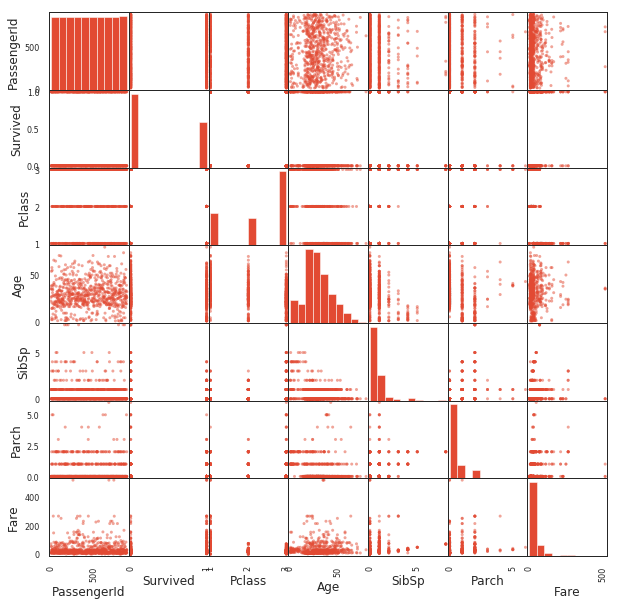

In [17]:
# scatter plot matrix
pd.plotting.scatter_matrix(train,figsize=(10,10))
plt.figure()

#### violinplots

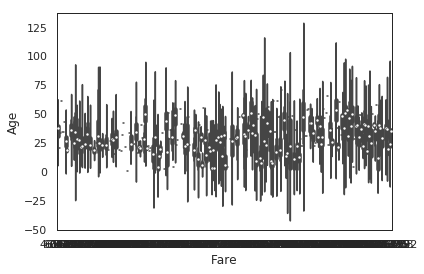

In [18]:
# violinplots on petal-length for each species
sns.violinplot(data=train,x="Fare", y="Age")

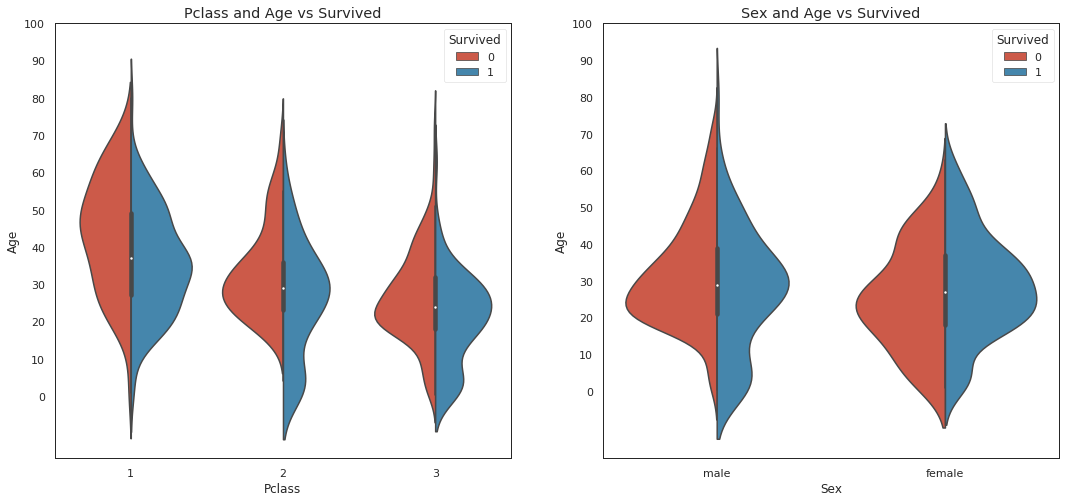

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### pairplot

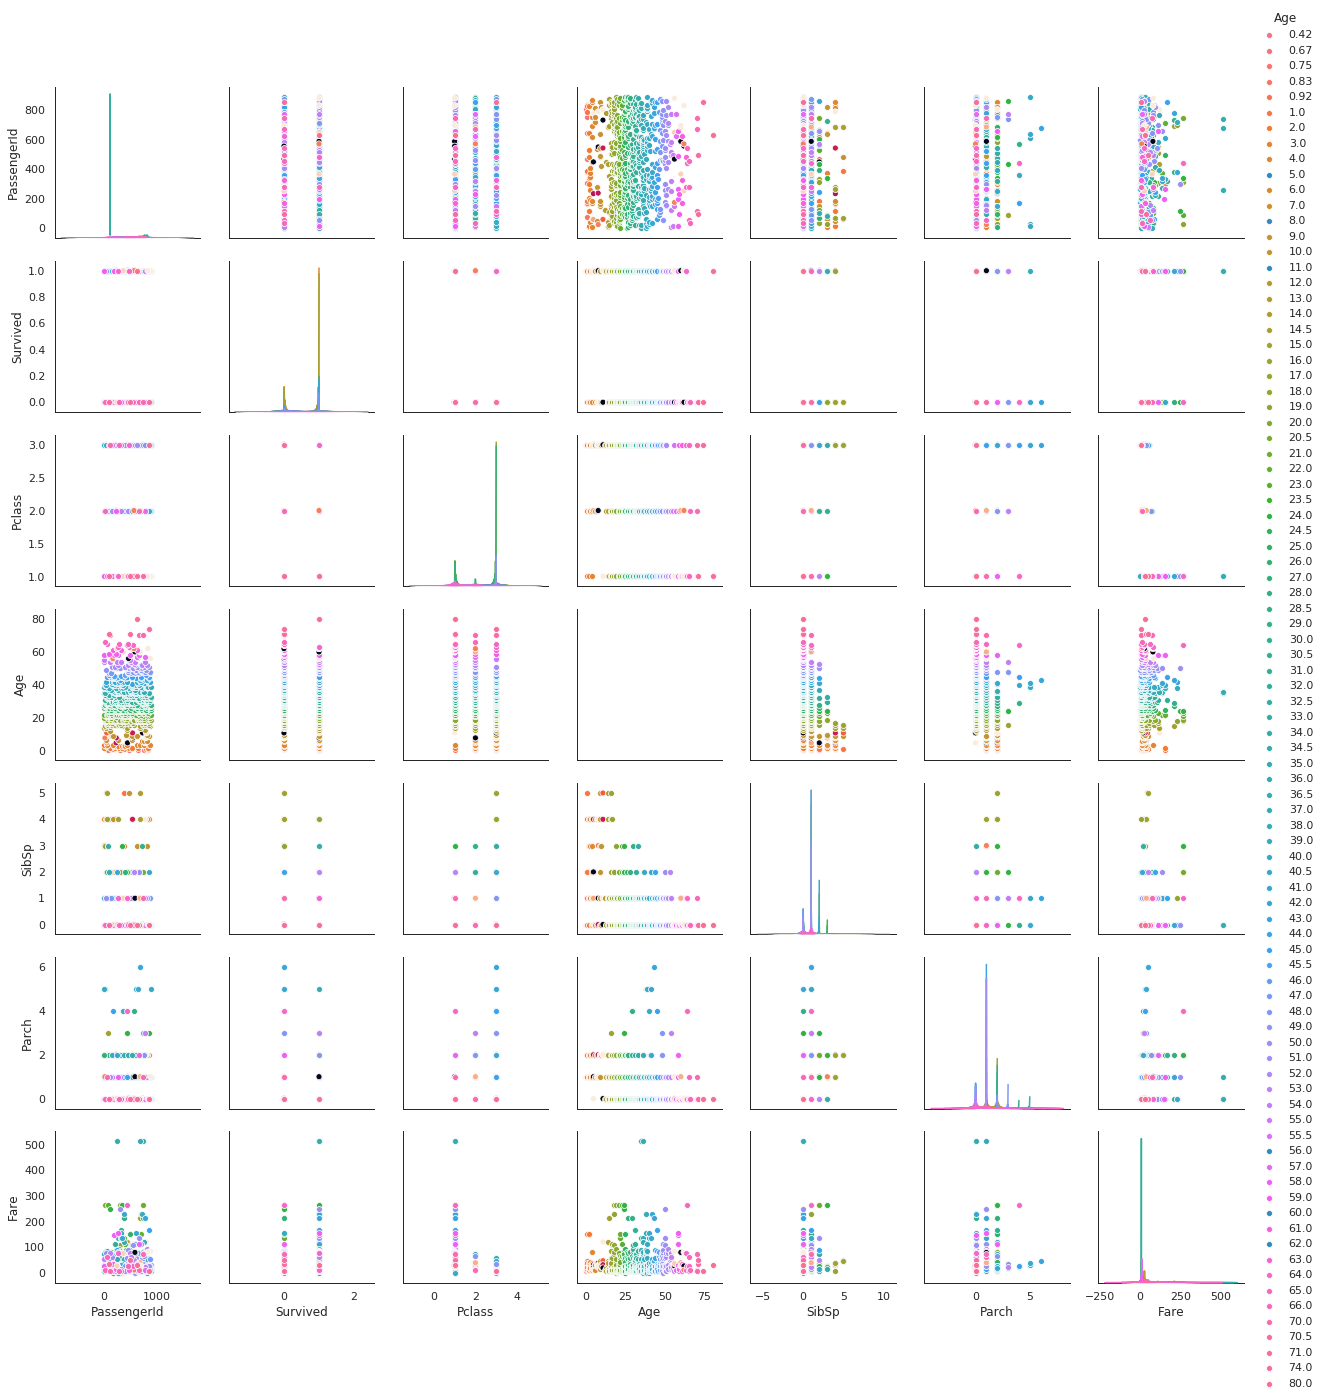

In [20]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(train, hue="Age")

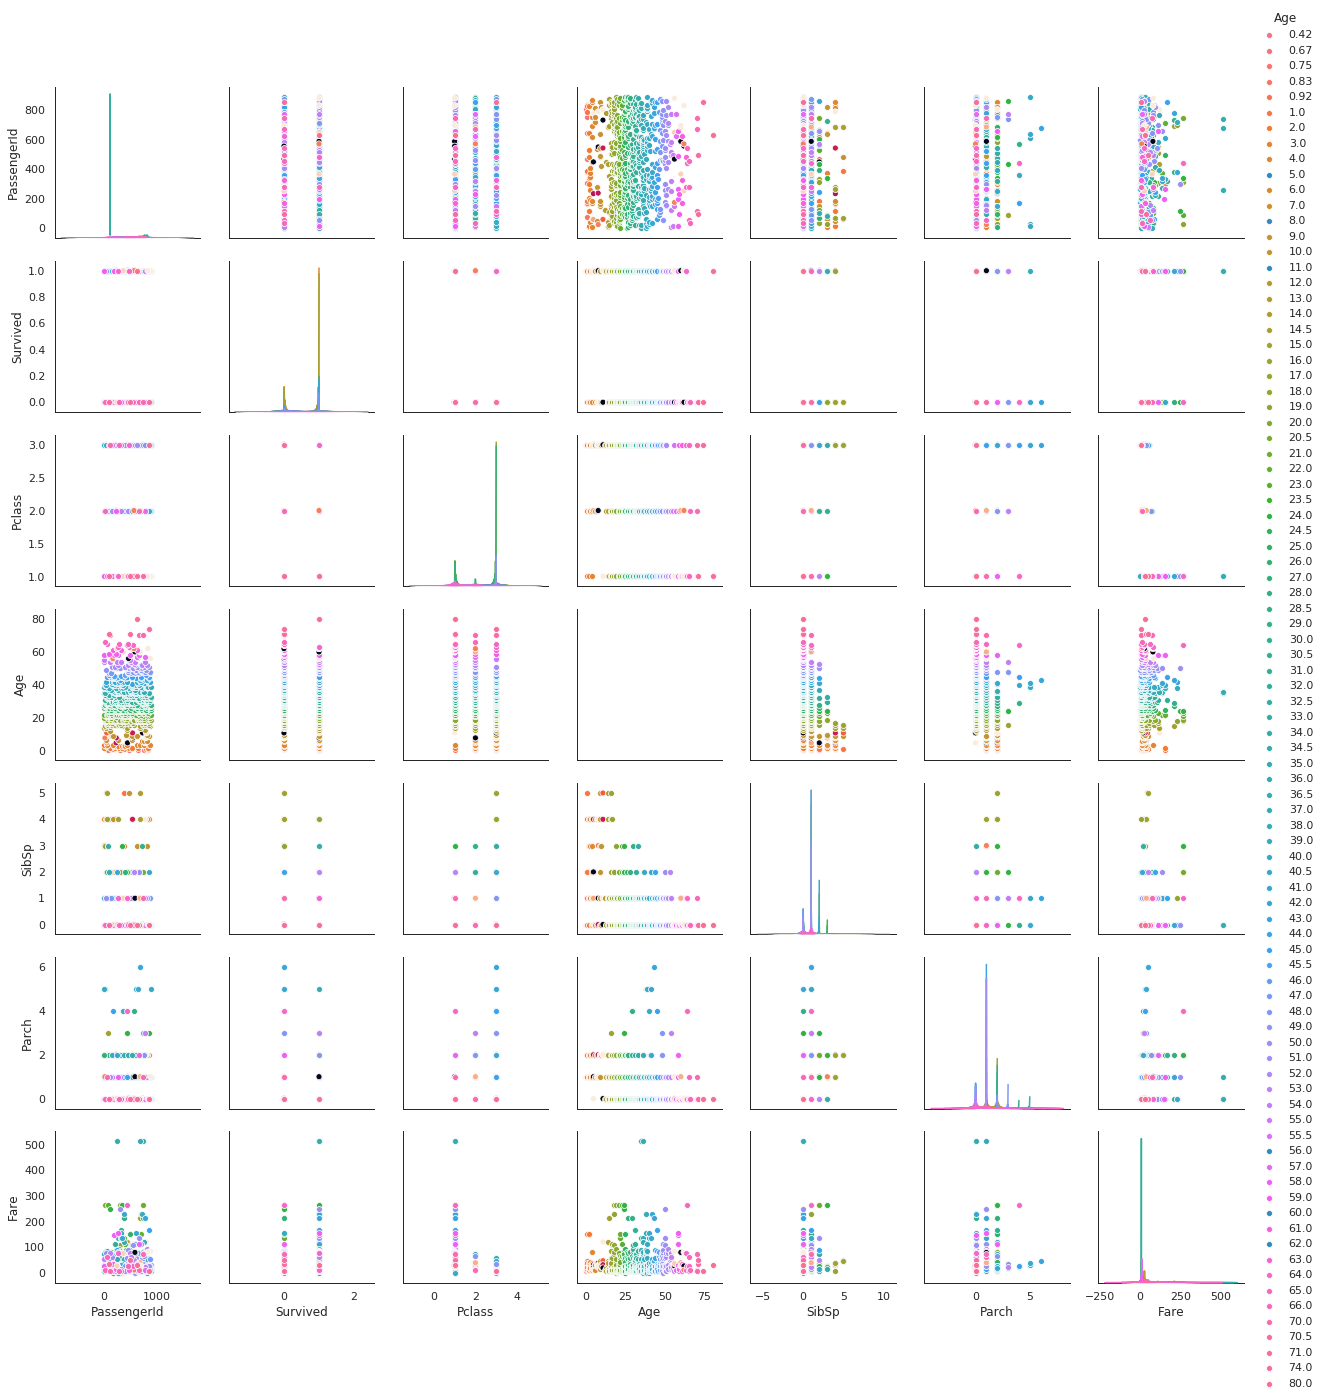

In [21]:
# updating the diagonal elements in a pairplot to show a kde
sns.pairplot(train, hue="Age",diag_kind="kde")

### Explorer Dataset

In [22]:
# shape
print(train.shape)

(891, 12)


In [23]:
#columns*rows
train.size

10692

In [24]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [28]:
train['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [29]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [32]:
# Seperating the data into dependent and independent variables
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [33]:
cols = train.columns
features = cols[0:12]
labels = cols[4]
print(features)
print(labels)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Sex


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)